<a href="https://colab.research.google.com/github/partizanos/advanced_image_processing/blob/master/AIP_TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercise 1. Single image compression

### Take any image x from the EXT YALE dataset given in the TP3.  Compress this image in its own optimal SVD basis as. Display the original and compressed images for k = {1, 2, ..., 10}

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import math
from scipy import fftpack 

!wget https://github.com/partizanos/advanced_image_processing/blob/master/EXT_YALE_B_Normal.mat?raw=true
!mv EXT_YALE_B_Normal.mat\?raw\=true data.mat

from scipy import io
v = io.loadmat('data.mat')

--2019-05-25 18:53:43--  https://github.com/partizanos/advanced_image_processing/blob/master/EXT_YALE_B_Normal.mat?raw=true
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/partizanos/advanced_image_processing/raw/master/EXT_YALE_B_Normal.mat [following]
--2019-05-25 18:53:43--  https://github.com/partizanos/advanced_image_processing/raw/master/EXT_YALE_B_Normal.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/partizanos/advanced_image_processing/master/EXT_YALE_B_Normal.mat [following]
--2019-05-25 18:53:43--  https://raw.githubusercontent.com/partizanos/advanced_image_processing/master/EXT_YALE_B_Normal.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to 

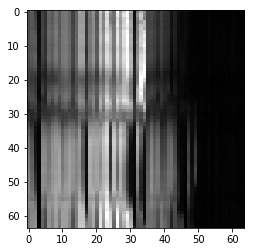

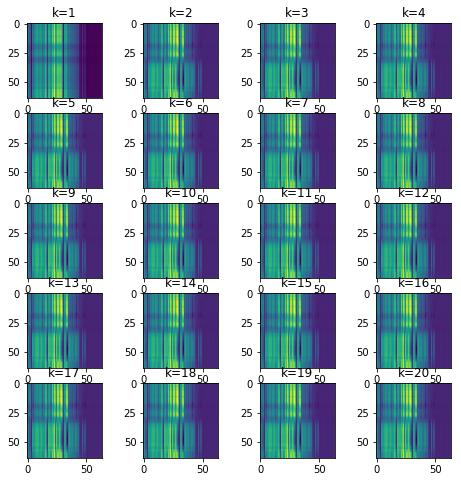

In [14]:
arr = np.array(v["faceData"])
plt.imshow(arr)
arr.shape
img1 = arr[:64, :64]
plt.imshow(img1, cmap = "gray")

def mse(imageA, imageB) -> float:
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err


def svd_compress(img, k):
  U,s,V = np.linalg.svd(img,full_matrices=False)
  reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))  
  return reconst_matrix


fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
k=1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    im_dis = svd_compress(img, k)
    plt.imshow(im_dis)
    plt.title("k="+str(k))
    k+= 1

plt.show()

• Plot the dependency betwee the k and the MSE between the original and corresponding
compressed image.

Text(0, 0.5, 'MSE')

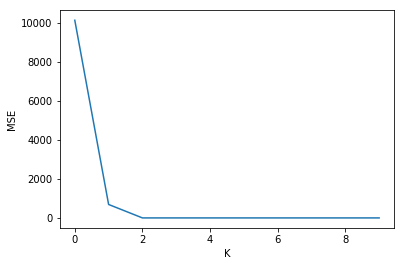

In [26]:
mses = []
Ks = [k for k in range(10)]
for k in Ks:
  im_dis = svd_compress(img, k)
  mses.append(mse(img, im_dis))

plt.plot( mses)
plt.xlabel("K")
plt.ylabel("MSE")




In [28]:
 U.shape,s.shape,V.shape , U,s,V 

((64, 64),
 (64,),
 (64, 64),
 array([[-0.13046538, -0.10199791, -0.05089178, ..., -0.09255802,
         -0.07402389, -0.02771462],
        [-0.12839456, -0.0988103 , -0.00273298, ..., -0.05633301,
         -0.13874842,  0.01432363],
        [-0.12389436, -0.08997474, -0.0197406 , ...,  0.12063883,
          0.14607265,  0.00955066],
        ...,
        [-0.14614644, -0.01404993, -0.32677778, ...,  0.04035403,
          0.03615922, -0.1818752 ],
        [-0.14589587, -0.01931818, -0.33557673, ...,  0.08260656,
          0.00957805,  0.29396698],
        [-0.14657503, -0.03273702, -0.33153318, ..., -0.08935603,
         -0.0340223 , -0.08813771]]),
 array([6.21568446e+03, 1.67967158e+03, 7.02155327e+02, 2.76725144e+02,
        2.59905058e+02, 1.77603352e+02, 1.62671400e+02, 8.95016517e+01,
        8.01403769e+01, 6.96773412e+01, 5.69774592e+01, 5.33201075e+01,
        4.30735709e+01, 3.70116589e+01, 3.31705736e+01, 2.97493939e+01,
        2.78481803e+01, 2.65205210e+01, 2.40184453e+01,